# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [73]:
#Write your code here, You may need to use python open() function to open the file and load data.

import pandas as pd
import matplotlib.pyplot as plt
import json

f = open('/yearinfo.json')
yearinfo = json.load(f)
print(yearinfo)

{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

In [74]:
#check the columns 
yearinfo['2010'][0].keys()

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [75]:
year_col = list(yearinfo['2010'][0].keys())+(['year'])
year_col

['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'year']

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [76]:
#write your code here

data_list = []
for key, value in yearinfo.items():
    for i in value:
        temp = list(i.values())+[key]
        data_list.append(temp)
df = pd.DataFrame(data_list,columns=year_col)
df.head()


band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [77]:
#Create datapoint in the formated value in the dataset
def list_value(list_name):
    value = list_name[0]
    return value

#datapoints entered in formated value
df['band_singer'] = df.band_singer.map(list_value)
df['song'] = df.song.map(list_value)
df['songurl'] = df.songurl.map(list_value)
df['url'] = df.url.map(list_value)

In [78]:
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [79]:
df.value_counts(subset=['band_singer']).loc[lambda x:x > 15]

band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
dtype: int64

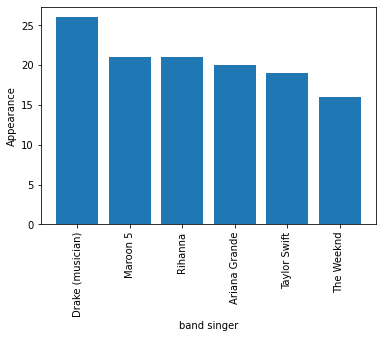

In [80]:
#Write your program and plot bar graph
y = df.band_singer.value_counts().loc[lambda x:x > 15]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('band singer')
plt.ylabel('Appearance')
plt.show()

**Question: Who is the most profilic singer?**


 Drake(musician)is most profilic singer for his 26 appearance

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [81]:
#write your code here

df['score'] = [101-i for i in df['ranking']]
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  score  
0             /wiki/Kesha  2010    100  
1   /wiki/Lady_Antebellum  2010     99  
2      /wiki/Train_(band)  2010     98  
3        /wiki/Katy_Perry  2010     97  
4  /wiki/Usher_(musician)  2010     96

In [82]:
#create a series
singer_score = {}

for singer, songs in df.groupby('band_singer'):
    singer_score[singer] = songs.score.sum()

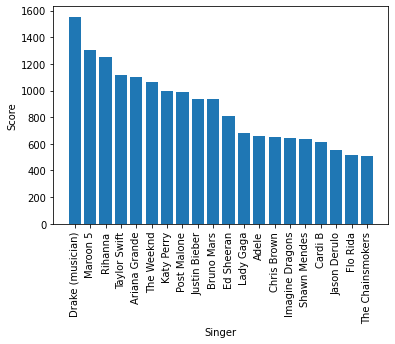

In [83]:
y = pd.Series(data=singer_score.values(), index = singer_score.keys()).sort_values(ascending=False)[:20]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('Singer')
plt.ylabel('Score')
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

The major change noticed was that singers in 4th and 5th place have changed their position. This change was because the first graph was based on number of appearance made by singer and second graph was based on total score by singers 

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

Group the data in term of score

In [84]:
#write your solution from here
new_df = df.groupby('score')
new_df.first()

band_singer                                       song  \
score                                                                  
1          Jerrod Niemann                         /wiki/Lover,_Lover   
2             Alicia Keys     /wiki/Try_Sleeping_with_a_Broken_Heart   
3      Cali Swag District               /wiki/Teach_Me_How_to_Dougie   
4           Uncle Kracker           /wiki/Smile_(Uncle_Kracker_song)   
5         Daughtry (band)       /wiki/Life_After_You_(Daughtry_song)   
...                   ...                                        ...   
96       Usher (musician)                     /wiki/OMG_(Usher_song)   
97             Katy Perry                     /wiki/California_Gurls   
98           Train (band)                     /wiki/Hey,_Soul_Sister   
99        Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
100                 Kesha                       /wiki/Tik_Tok_(song)   

                                   songurl  ranking  \
score                                                 
1                             Lover, Lover      100   
2         Try Sleeping with a Broken Heart       99   
3                   Teach Me How to Dougie       98   
4               Smile (Uncle Kracker song)       97   
5           Life After You (Daughtry song)       96   
...                                    ...      ...   
96                        OMG (Usher song)        5   
97                        California Gurls        4   
98                        Hey, Soul Sister        3   
99     Need You Now (Lady Antebellum song)        2   
100                         Tik Tok (song)        1   

                                titletext                       url  year  
score                                                                      
1                          "Lover, Lover"      /wiki/Jerrod_Niemann  2010  
2      "Try Sleeping with a Broken Heart"         /wiki/Alicia_Keys  2010  
3                "Teach Me How to Dougie"  /wiki/Cali_Swag_District  2010  
4                                 "Smile"       /wiki/Uncle_Kracker  2010  
5                        "Life After You"     /wiki/Daughtry_(band)  2010  
...                                   ...                       ...   ...  
96                                  "OMG"    /wiki/Usher_(musician)  2010  
97                     "California Gurls"          /wiki/Katy_Perry  2010  
98                     "Hey, Soul Sister"        /wiki/Train_(band)  2010  
99                         "Need You Now"     /wiki/Lady_Antebellum  2010  
100                             "Tik Tok"               /wiki/Kesha  2010  

[100 rows x 7 columns]

## SUBMISSION DATE: 2nd April 2022 